# Scenario 2: Minority Game Strategy Mechanisms

Compare two simulations, one with basic setting and the rest with strategy update (reset) or partial update, we argue that ones with strategy update options would lead to a more successful outcome. 

**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

## Import Libraries

In [72]:
import numpy as np
#import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import norm

# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports
# Use anything from lib package
# E.g.
#from lib.functions import simulate_simple_game
#simulate_simple_game()
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot

In [73]:
# helper functions
def hist_sp_plot(x1,y1):
    fig, axes = plt.subplots(1,1, figsize=(20,8))
    fig.suptitle('Success rate as a function of update rate \n (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)
    
    axes.axhline(y=success_rate0, color="k", linestyle="--")
    axes.plot(x1, y1)
    axes.set_xlabel('update rate',fontsize=15)
    axes.set_ylabel('success rate',fontsize=15)


#### Analysis process 
![alt text](out/scenario2_flow.png)

## Base Senario - One group, strategy update ratio p = 0

In [74]:
# main parameter initialisation
s = 2
m0 = 3 #5 
n_agents = 101
num_run = 5000
p_list0=np.linspace(0, 1, 15)
p_list1=np.linspace(0, 0.1, 15)
p_list2=np.linspace(0.003, 0.015, 15)

In [75]:
'''
The following parameters have been initialized above:
    - n_agents
    - agent_cls = Agent
    - strategy_clss = [DefaultStrategy]
    - memory_generator = UniformMemoryGenerator(m0)
    - max_steps = 5000

'''

game0 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times, attendances, mean_A_t, vol_A_t = game0.simulate_game(max_steps=num_run)
success_rate0=game0.total_success_rate()


### plotting

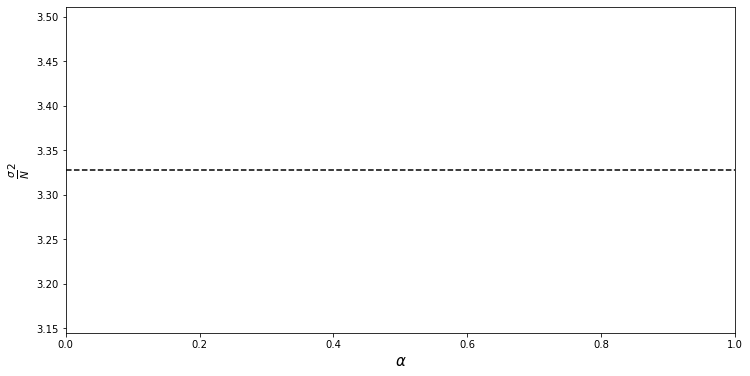

In [76]:
# plot base case
omega_0 = np.average(vol_A_t)/n_agents
alpha_0 = 2**m0/n_agents

fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(y=omega_0, color="k", linestyle="--")
#ax.axvline(x=alpha_0, color="k", linestyle="--")

#plt.title("Volatilty as a function of alpha \n (MG with s=%s, N=%s)"%(s, n_agents), fontsize=18)
ax.set_xlabel(r"$\alpha$",fontsize=15)
ax.set_ylabel(r"$\frac{\sigma}{N}^2$",fontsize=15)

plt.show()

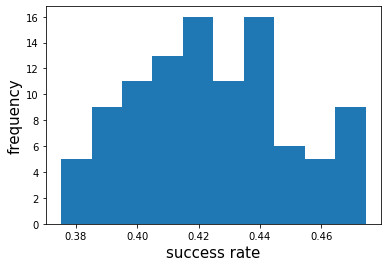

In [77]:
# compute individual success rate list
int_agent_success=[game0.agents[i].success_rate() for i in range(n_agents)]

# plot histogram
counts0, bins0 = np.histogram(int_agent_success)
plt.hist(bins0[:-1], bins0, weights=counts0)
plt.xlabel('success rate',fontsize=15)
plt.ylabel('frequency',fontsize=15)
#plt.title('Individual Success Rate Histogram \n (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)
plt.show()

## Find optimal update rate that maximizes success rate of agent

### without grouping

- case 1: p in [0,1]
- case 2: p in [0,0.1]
- case 3: p in [0.003, 0.015]

#### Case 1

In [78]:
%%time

tot_omega_001 = []
tot_alpha_001 = []
tot_success_001 = []
tot_int_success_001 = []

for p in p_list0:
    game1 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times1, attendances1, mean_A_t1, vol_A_t1 = game1.simulate_game(max_steps=num_run)
    success_rate1 = game1.total_success_rate()
    # compute individual success rate list
    int_agent_success1=[game1.agents[i].success_rate() for i in range(n_agents)]
    
    # in order to create the graph
    omega = np.average(vol_A_t1)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_001.append(omega)
    tot_alpha_001.append(alpha)
    tot_success_001.append(success_rate1)
    tot_int_success_001.append(int_agent_success1)

CPU times: user 45min 2s, sys: 14.7 s, total: 45min 16s
Wall time: 46min 16s


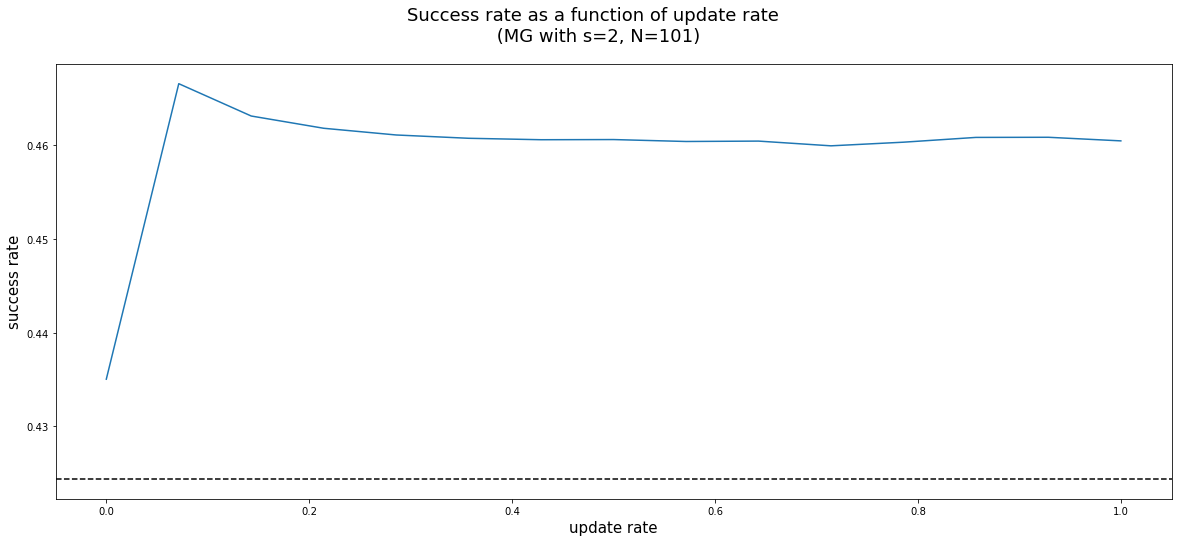

In [79]:
hist_sp_plot(p_list0, tot_success_001)


#### case 2

In [80]:
%%time
tot_omega_002 = []
tot_alpha_002 = []
tot_success_002 = []
tot_int_success_002 = []

for p in p_list1:
    game20 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times20, attendances20, mean_A_t20, vol_A_t20 = game20.simulate_game(max_steps=num_run)
    success_rate = game20.total_success_rate()
     # compute individual success rate list
    int_agent_success20=[game20.agents[i].success_rate() for i in range(n_agents)]
    
    # in order to create the graph
    omega = np.average(vol_A_t20)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_002.append(omega)
    tot_alpha_002.append(alpha)
    tot_success_002.append(success_rate)
    tot_int_success_002.append(int_agent_success20)

CPU times: user 29min 40s, sys: 8.58 s, total: 29min 49s
Wall time: 29min 50s


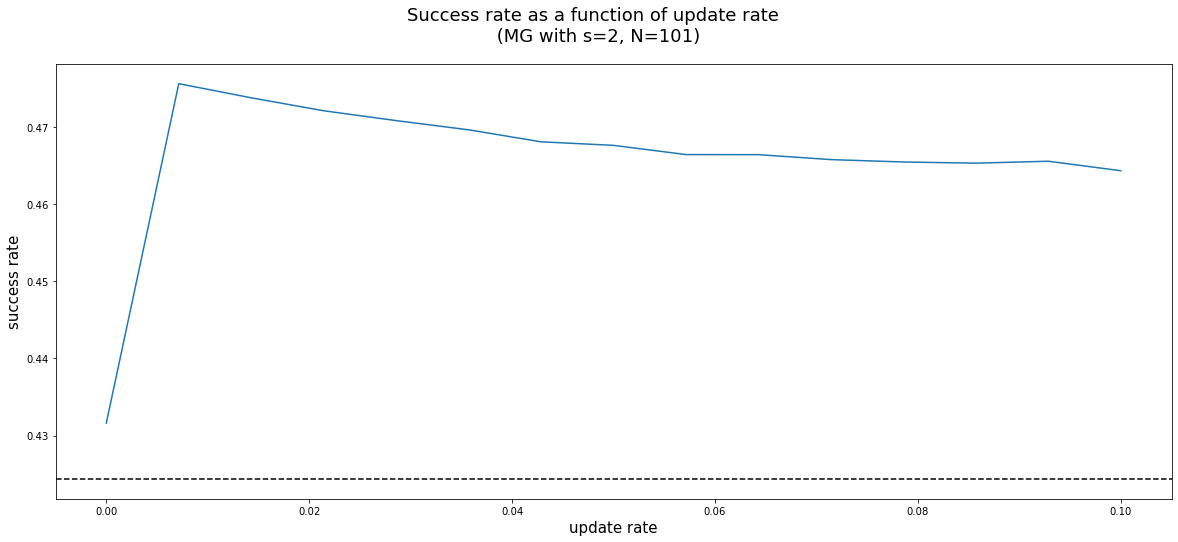

In [81]:
hist_sp_plot(p_list1, tot_success_002)

#### Case 3

In [82]:
%%time
tot_omega_003 = []
tot_alpha_003 = []
tot_success_003 = []
tot_int_success_003 = []

for p in p_list2:
    game30 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times30, attendances30, mean_A_t30, vol_A_t30 = game30.simulate_game(max_steps=num_run)
    success_rate = game30.total_success_rate()
    # compute individual success rate list
    int_agent_success30=[game30.agents[i].success_rate() for i in range(n_agents)]
    
    # in order to create the graph
    omega = np.average(vol_A_t30)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_003.append(omega)
    tot_alpha_003.append(alpha)
    tot_success_003.append(success_rate)
    tot_int_success_003.append(int_agent_success30)

CPU times: user 28min 15s, sys: 8.16 s, total: 28min 23s
Wall time: 28min 25s


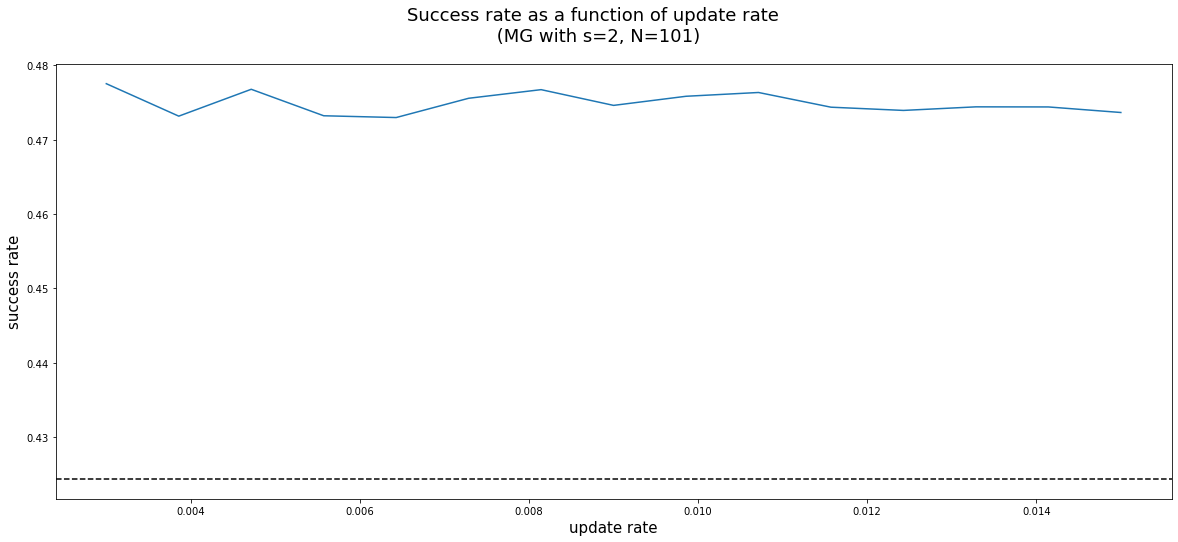

In [83]:
hist_sp_plot(p_list2, tot_success_003)

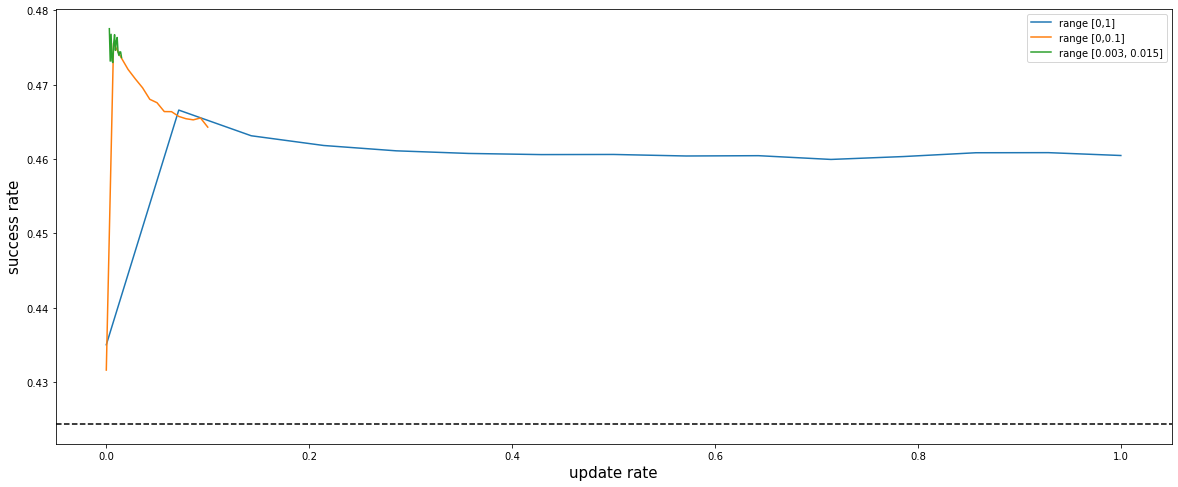

In [173]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
#fig.suptitle('Success rate as a function of update rate \n (MG with s=%s, N=%s, m=%s)'%(s, n_agents, m0), fontsize=18)

axes.axhline(y=success_rate0, color="k", linestyle="--")
axes.plot(p_list0, tot_success_001, label="range [0,1]")
axes.plot(p_list1, tot_success_002, label="range [0,0.1]")
axes.plot(p_list2, tot_success_003, label="range [0.003, 0.015]")

axes.set_xlabel('update rate',fontsize=15)
axes.set_ylabel('success rate',fontsize=15)
axes.legend()

plt.savefig("out/SR_P_%s_%s_%s.png" % (n_agents, s, m0), dpi = 300)

### with grouping

- case 1: p in [0,1]
- case 2: p in [0,0.1]
- case 3: p in [0.003, 0.015]

#### Case 1

In [85]:
%%time
tot_omega_0011 = []
tot_alpha_0011 = []
tot_success_0011 = []
tot_int_success_0011 = []

for p in p_list0:
    game11 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            0.8: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
            0.2: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p, #prob of an agent updating strategy per round
                    #strategy_update_fraction=0.3 #fraction of strategy vector
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times11, attendances11, mean_A_t11, vol_A_t11 = game11.simulate_game(max_steps=num_run)
    success_rate11 = game11.total_success_rate()
    # compute individual success rate list
    int_agent_success11=[game11.agents[i].success_rate() for i in range(n_agents-1)]
    
    # in order to create the graph
    omega = np.average(vol_A_t11)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_0011.append(omega)
    tot_alpha_0011.append(alpha)
    tot_success_0011.append(success_rate11)
    tot_int_success_0011.append(int_agent_success11)

CPU times: user 29min 32s, sys: 8.36 s, total: 29min 40s
Wall time: 29min 42s


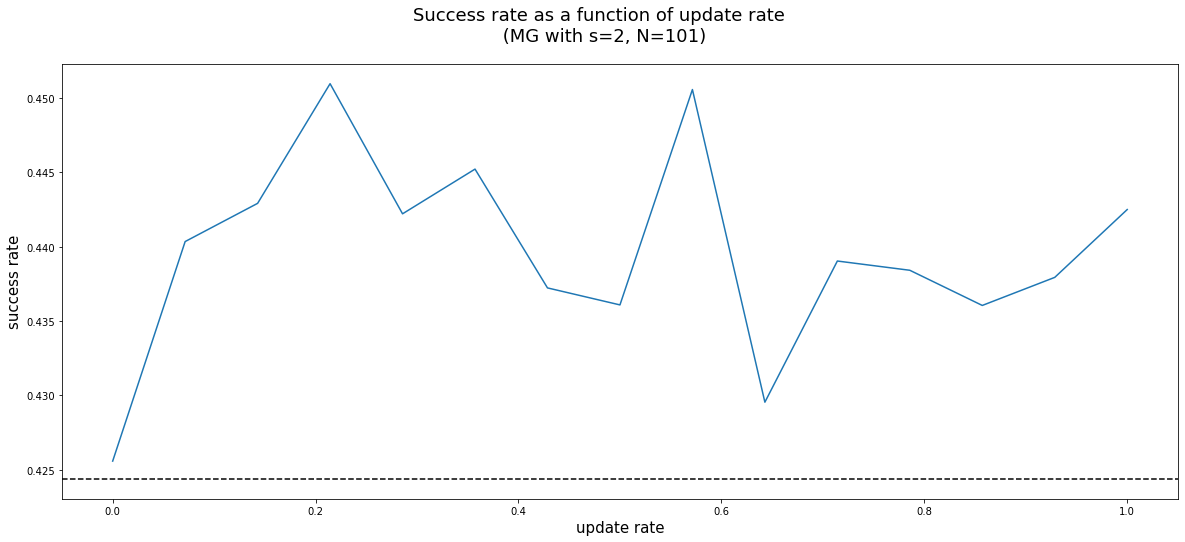

In [86]:
hist_sp_plot(p_list0, tot_success_0011)

#### case 2

In [87]:
%%time
tot_omega_0021 = []
tot_alpha_0021 = []
tot_success_0021 = []
tot_int_success_0021 = []

for p in p_list1:
    game21 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            0.8: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
            0.2: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p, #prob of an agent updating strategy per round
                    #strategy_update_fraction=0.3 #fraction of strategy vector
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times21, attendances21, mean_A_t21, vol_A_t21 = game21.simulate_game(max_steps=num_run)
    success_rate21 = game21.total_success_rate()
    # compute individual success rate list
    int_agent_success21=[game21.agents[i].success_rate() for i in range(n_agents-1)]
    
    # in order to create the graph
    omega = np.average(vol_A_t21)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_0021.append(omega)
    tot_alpha_0021.append(alpha)
    tot_success_0021.append(success_rate21)
    tot_int_success_0021.append(int_agent_success21)

CPU times: user 26min 31s, sys: 7.89 s, total: 26min 39s
Wall time: 26min 40s


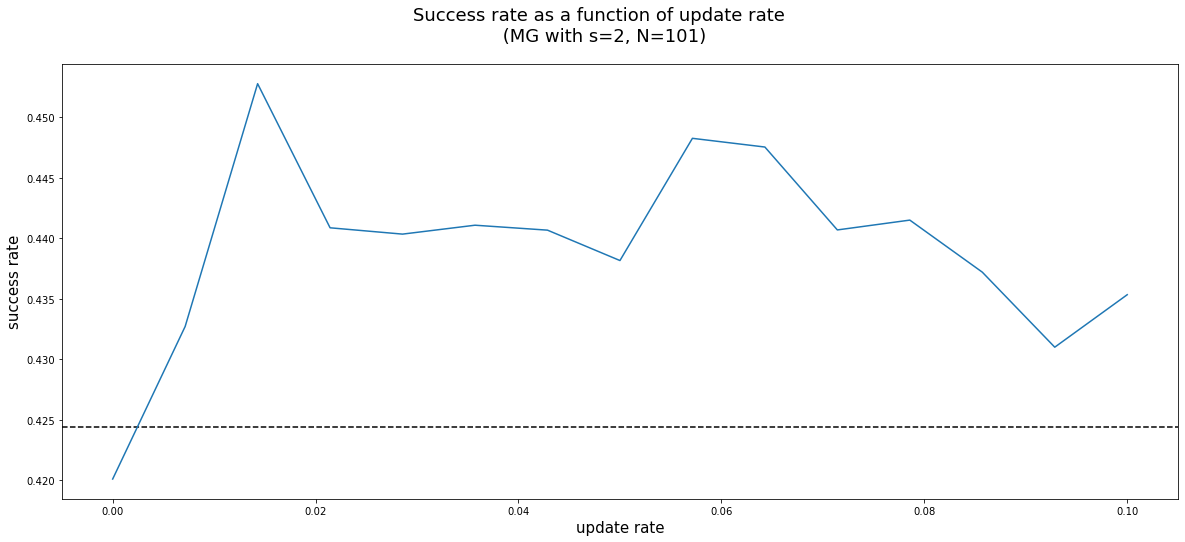

In [88]:
hist_sp_plot(p_list1, tot_success_0021)

#### case 3

In [89]:
%%time
tot_omega_0031 = []
tot_alpha_0031 = []
tot_success_0031 = []
tot_int_success_0031 = []

for p in p_list2:
    game31 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            0.8: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
            0.2: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p, #prob of an agent updating strategy per round
                    #strategy_update_fraction=0.3 #fraction of strategy vector
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times31, attendances31, mean_A_t31, vol_A_t31 = game31.simulate_game(max_steps=num_run)
    success_rate31 = game31.total_success_rate()
    # compute individual success rate list
    int_agent_success31=[game31.agents[i].success_rate() for i in range(n_agents-1)]
    
    # in order to create the graph
    omega = np.average(vol_A_t31)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_0031.append(omega)
    tot_alpha_0031.append(alpha)
    tot_success_0031.append(success_rate31)
    tot_int_success_0031.append(int_agent_success31)

CPU times: user 26min 15s, sys: 7.95 s, total: 26min 23s
Wall time: 26min 25s


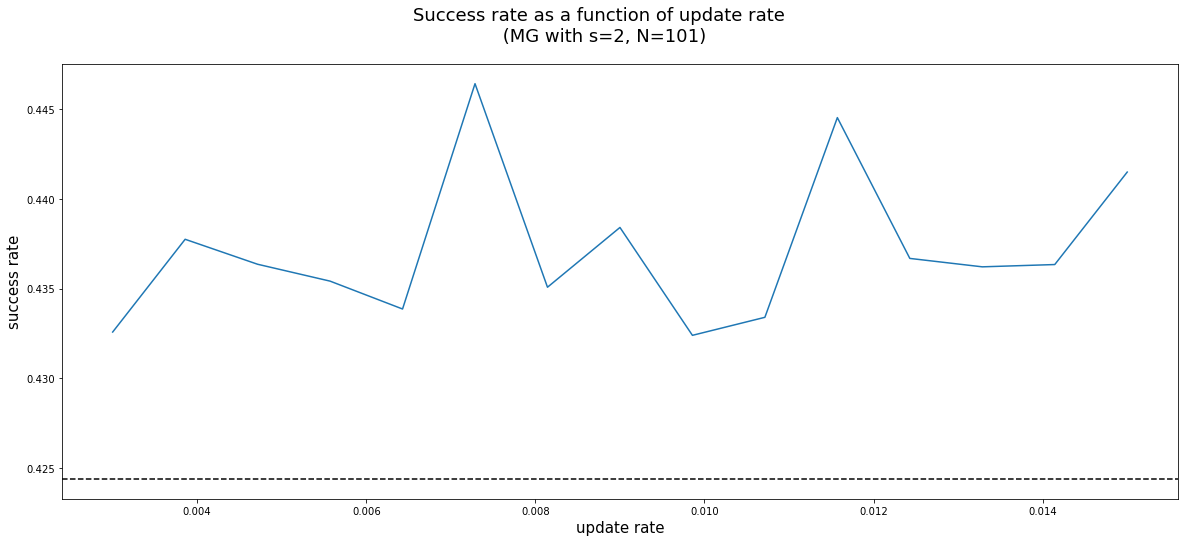

In [90]:
hist_sp_plot(p_list2, tot_success_0031)

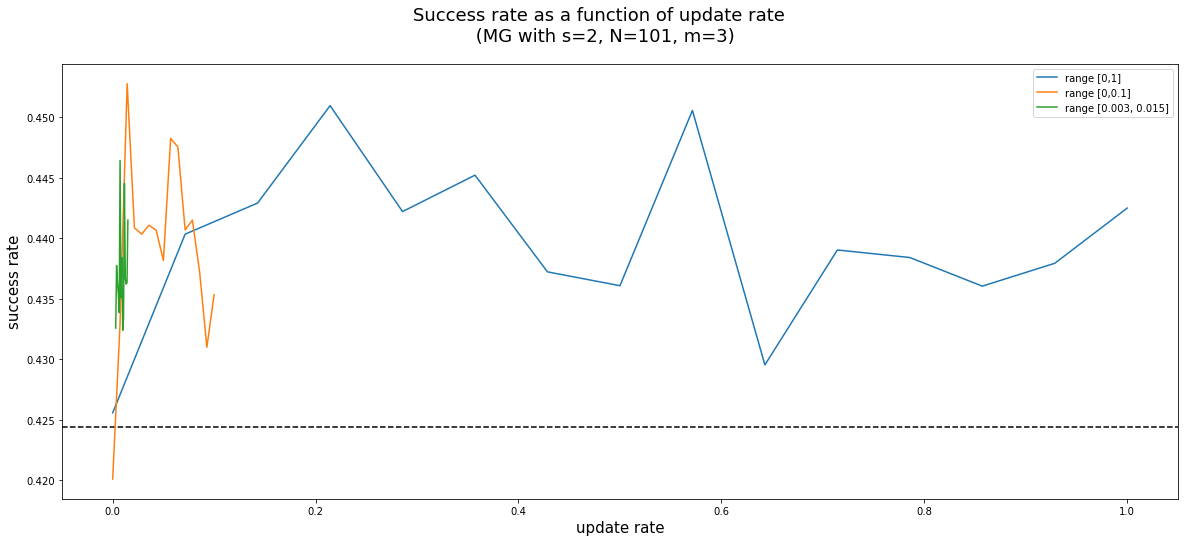

In [91]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
fig.suptitle('Success rate as a function of update rate \n (MG with s=%s, N=%s, m=%s)'%(s, n_agents, m0), fontsize=18)

axes.axhline(y=success_rate0, color="k", linestyle="--")
axes.plot(p_list0, tot_success_0011, label="range [0,1]")
axes.plot(p_list1, tot_success_0021, label="range [0,0.1]")
axes.plot(p_list2, tot_success_0031, label="range [0.003, 0.015]")
#hist_sp_plot(p_list0, tot_success_001)
#hist_sp_plot(p_list1, tot_success_002)
#hist_sp_plot(p_list2, tot_success_003)

axes.set_xlabel('update rate',fontsize=15)
axes.set_ylabel('success rate',fontsize=15)
axes.legend()

### Derive optimal p

In [92]:
# no grouping
res = tot_success_003.index(max(tot_success_003))
pmax=p_list2[res]
print(pmax)

# grouping
res2 = tot_success_0031.index(max(tot_success_0031))
pmax2=p_list2[res2]
print(pmax2)

0.003
0.007285714285714286


### Find optimal strategy_update_fraction $p_{frac}$ when  p = $p_{optimal}$
- $p_{frac}$ in [0,1]
 - without grouping
 - with grouping

#### no grouping

In [93]:
%%time
### without grouping
#p_list0=np.linspace(0, 1, 15)
tot_omega_001f = []
tot_alpha_001f = []
tot_success_001f = []
tot_int_success_001f = []

for pf in p_list0:
    game1f = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=pmax,
                    strategy_update_fraction=pf
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times1f, attendances1f, mean_A_t1f, vol_A_t1f = game1f.simulate_game(max_steps=num_run)
    success_rate1f = game1f.total_success_rate()
    # compute individual success rate list
    int_agent_success1f=[game1f.agents[i].success_rate() for i in range(n_agents)]
    
    # in order to create the graph
    omega = np.average(vol_A_t1f)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_001f.append(omega)
    tot_alpha_001f.append(alpha)
    tot_success_001f.append(success_rate1f)
    tot_int_success_001f.append(int_agent_success1f)

CPU times: user 27min 59s, sys: 7.89 s, total: 28min 7s
Wall time: 28min 10s


#### grouping

In [94]:
%%time
tot_omega_002f = []
tot_alpha_002f = []
tot_success_002f = []
tot_int_success_002f = []

for pf in p_list0:
    game2f = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            0.8: AgentFactory(
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy]
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
            0.2: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=pmax, #prob of an agent updating strategy per round
                    strategy_update_fraction=pf #fraction of strategy vector
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }   
    )
 

    
    times2f, attendances2f, mean_A_t2f, vol_A_t2f = game2f.simulate_game(max_steps=num_run)
    success_rate2f = game2f.total_success_rate()
    # compute individual success rate list
    int_agent_success2f=[game2f.agents[i].success_rate() for i in range(n_agents-1)]
    
    # in order to create the graph
    omega = np.average(vol_A_t2f)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_002f.append(omega)
    tot_alpha_002f.append(alpha)
    tot_success_002f.append(success_rate2f)
    tot_int_success_002f.append(int_agent_success2f)

CPU times: user 26min 17s, sys: 7.65 s, total: 26min 25s
Wall time: 26min 27s


In [172]:
res = tot_success_001f.index(max(tot_success_001f))
pfmax=p_list0[res]

res2 = tot_success_002f.index(max(tot_success_002f))
pfmax2=p_list0[res2]
print("optimal $p_frac$ = {} without grouping \n optimal $p_frac$ = {} with grouping".format(pfmax,pfmax2))

optimal $p_frac$ = 0.7857142857142857 without grouping 
 optimal $p_frac$ = 0.8571428571428571 with grouping


## Validate hypothesis
- without grouping
 - without strategy_update_fraction: case 1
 - with strategy_update_fraction: case 2
 
- with grouping
 - without strategy_update_fraction: case 3
 - with strategy_update_fraction: case 4

### case 1

In [96]:
%%time
game02 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=pmax
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times02, attendances02, mean_A_t02, vol_A_t02 = game02.simulate_game(max_steps=num_run)
success_rate02=game02.total_success_rate()

CPU times: user 1min 52s, sys: 564 ms, total: 1min 53s
Wall time: 1min 53s


### case 2

In [97]:
%%time
game021 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=pmax,
                strategy_update_fraction=pfmax
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times021, attendances021, mean_A_t021, vol_A_t021 = game021.simulate_game(max_steps=num_run)
success_rate021=game021.total_success_rate()

CPU times: user 1min 52s, sys: 706 ms, total: 1min 53s
Wall time: 1min 53s


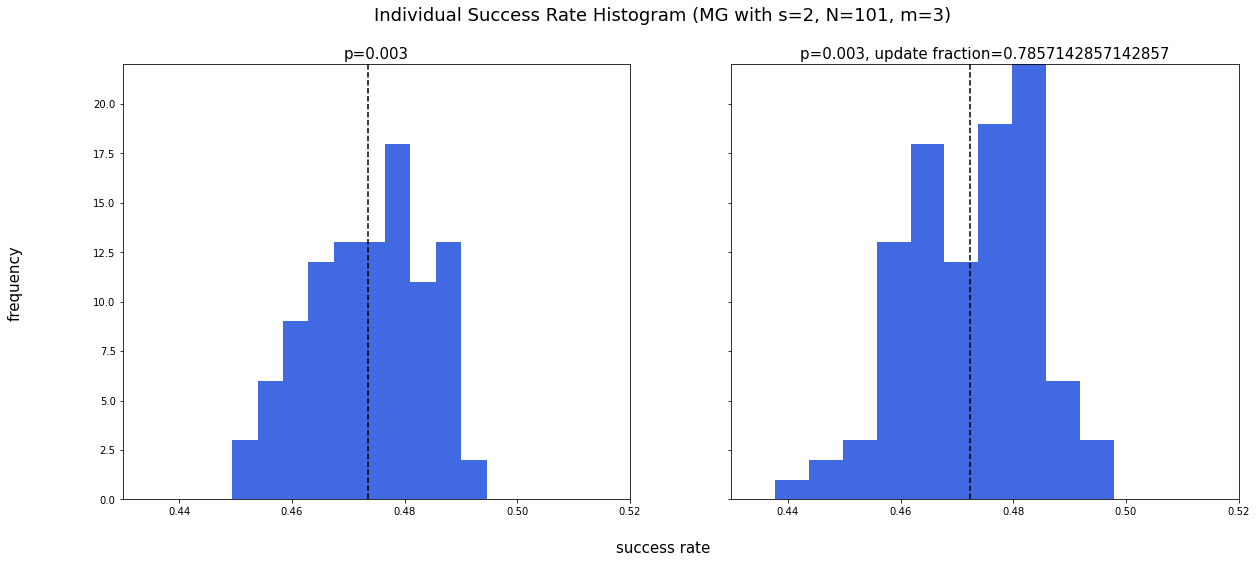

In [159]:
fig, axes = plt.subplots(1,2, sharex='col', sharey='row',figsize=(20,8))
fig.suptitle('Individual Success Rate Histogram (MG with s=%s, N=%s, m=%s)'%(s, n_agents, m0), fontsize=18)
fig.text(0.5,0.04, "success rate", ha="center", va="center",fontsize=15)
fig.text(0.05,0.5, "frequency", ha="center", va="center",fontsize=15, rotation=90)

# compute individual success rate list
int_agent_success02=[game02.agents[i].success_rate() for i in range(n_agents-1)]
int_agent_success021=[game021.agents[i].success_rate() for i in range(n_agents-1)]

# plot histogram
counts02, bins02 = np.histogram(int_agent_success02)
axes[0].hist(bins02[:-1], bins02, weights=counts02,color='royalblue')
axes[0].set_xlim(0.43, 0.52)
axes[0].set_ylim(0, 22)
axes[0].set_title("p=%s"%(pmax), fontsize=15)
int_agent_success02=np.array(int_agent_success02)
avg_int_agent_success02=np.mean(int_agent_success02)
axes[0].axvline(x=avg_int_agent_success02, color="k", linestyle="--")

counts021, bins021 = np.histogram(int_agent_success021)
axes[1].hist(bins021[:-1], bins021, weights=counts021,color='royalblue')
axes[1].set_xlim(0.43, 0.52)
axes[1].set_ylim(0, 22)
axes[1].set_title("p=%s, update fraction=%s"%(pmax, pfmax), fontsize=15)
int_agent_success021=np.array(int_agent_success021)
avg_int_agent_success021=np.mean(int_agent_success021)
axes[1].axvline(x=avg_int_agent_success021, color="k", linestyle="--")

plt.show()
#plt.savefig("out/p_successrate_%s_%s.png" % (n_agents, s), dpi = 300)


### case 3

In [100]:
%%time
game01 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        0.8: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
        0.2: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=pmax2, #prob of an agent updating strategy per round
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times01, attendances01, mean_A_t01, vol_A_t01 = game01.simulate_game(max_steps=num_run)
success_rate01=game01.total_success_rate()

CPU times: user 1min 45s, sys: 478 ms, total: 1min 45s
Wall time: 1min 45s


### case 4

In [101]:
%%time
game011 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        0.8: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
        0.2: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=pmax2, #prob of an agent updating strategy per round
                strategy_update_fraction=pfmax2 #fraction of strategy vector
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times011, attendances011, mean_A_t011, vol_A_t011 = game011.simulate_game(max_steps=num_run)
success_rate011=game011.total_success_rate()

CPU times: user 1min 44s, sys: 464 ms, total: 1min 45s
Wall time: 1min 45s


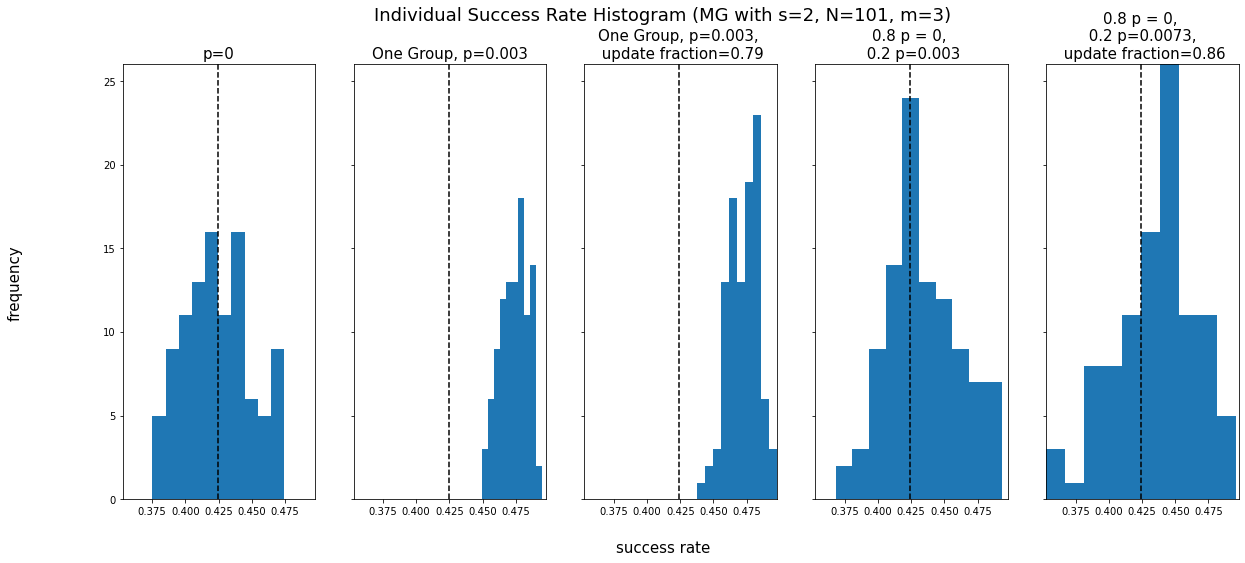

In [156]:
fig, axes = plt.subplots(1,5, sharex='col', sharey='row',figsize=(20,8))
fig.suptitle('Individual Success Rate Histogram (MG with s=%s, N=%s, m=%s)'%(s, n_agents, m0), fontsize=18)
fig.text(0.5,0.04, "success rate", ha="center", va="center",fontsize=15)
fig.text(0.05,0.5, "frequency", ha="center", va="center",fontsize=15, rotation=90)

# compute individual success rate list
int_agent_success=[game0.agents[i].success_rate() for i in range(n_agents)]
int_agent_success02=[game02.agents[i].success_rate() for i in range(n_agents)]
int_agent_success021=[game021.agents[i].success_rate() for i in range(n_agents)]
int_agent_success01=[game01.agents[i].success_rate() for i in range(n_agents-1)]
int_agent_success011=[game011.agents[i].success_rate() for i in range(n_agents-1)]

# plot histogram

## find common range for x,y limits
int_agent_success=np.array(int_agent_success)
int_agent_success02=np.array(int_agent_success02)
int_agent_success021=np.array(int_agent_success021)
int_agent_success01=np.array(int_agent_success01)
int_agent_success011=np.array(int_agent_success011)

counts0, bins0 = np.histogram(int_agent_success)
counts02, bins02 = np.histogram(int_agent_success02)
counts021, bins021 = np.histogram(int_agent_success021)
counts01, bins01 = np.histogram(int_agent_success01)
counts011, bins011 = np.histogram(int_agent_success011)

comb_ls = np.concatenate((int_agent_success, int_agent_success02, int_agent_success021, int_agent_success01, int_agent_success011))
comb_ls_sorted=np.sort(comb_ls)

count_comb = np.concatenate((counts0, counts02, counts021, counts01, counts011))
count_comb_sorted = np.sort(count_comb)

LL = comb_ls_sorted[0]
UL = comb_ls_sorted[-1]
yUL=max(count_comb_sorted)

# make subplots
axes[0].hist(bins0[:-1], bins0, weights=counts0)
axes[0].set_xlim(LL, UL)
axes[0].set_ylim(0, yUL)
axes[0].set_title("p=0", fontsize=15)
int_agent_success=np.array(int_agent_success)
avg_int_agent_success=np.mean(int_agent_success)
axes[0].axvline(x=avg_int_agent_success, color="k", linestyle="--")

axes[1].hist(bins02[:-1], bins02, weights=counts02)
axes[1].set_xlim(LL, UL)
axes[1].set_ylim(0, yUL)
axes[1].set_title("One Group, p=%s"%(round(pmax,4)), fontsize=15)
avg_int_agent_success02=np.mean(int_agent_success02)
axes[1].axvline(x=avg_int_agent_success, color="k", linestyle="--")

axes[2].hist(bins021[:-1], bins021, weights=counts021)
axes[2].set_xlim(LL, UL)
axes[2].set_ylim(0, yUL)
axes[2].set_title("One Group, p=%s, \n update fraction=%s"%(round(pmax,4), round(pfmax,2)), fontsize=15)
avg_int_agent_success021=np.mean(int_agent_success021)
axes[2].axvline(x=avg_int_agent_success, color="k", linestyle="--")

axes[3].hist(bins01[:-1], bins01, weights=counts01)
axes[3].set_xlim(LL, UL)
axes[3].set_ylim(0, yUL)
axes[3].set_title("0.8 p = 0, \n 0.2 p=%s"%(round(pmax,4)), fontsize=15)
avg_int_agent_success01=np.mean(int_agent_success01)
axes[3].axvline(x=avg_int_agent_success, color="k", linestyle="--")

axes[4].hist(bins011[:-1], bins011, weights=counts011)
axes[4].set_xlim(LL, UL)
axes[4].set_ylim(0, yUL)
axes[4].set_title("0.8 p = 0, \n 0.2 p=%s, \n update fraction=%s"%(round(pmax2,4), round(pfmax2,2)), fontsize=15)
avg_int_agent_success011=np.mean(int_agent_success011)
axes[4].axvline(x=avg_int_agent_success, color="k", linestyle="--")


plt.show()
#plt.savefig("out/p_pf_successrate_%s_%s_%s.png" % (n_agents, s, m0), dpi = 300)

#### Comparing when $m=5$
![alt text](out/p_pf_successrate_101_2_5.png)

In [164]:
# compute numerical representation of histogram
gt_avg_count0 = [i for i in int_agent_success if i > avg_int_agent_success]
gt_avg_count02 = [i for i in int_agent_success02 if i > avg_int_agent_success]
gt_avg_count021 = [i for i in int_agent_success021 if i > avg_int_agent_success]
gt_avg_count01 = [i for i in int_agent_success01 if i > avg_int_agent_success]
gt_avg_count011 = [i for i in int_agent_success011 if i > avg_int_agent_success]

num_gt_avg_count0=len(gt_avg_count0) 
num_gt_avg_count02=len(gt_avg_count02)
num_gt_avg_count021=len(gt_avg_count021)
num_gt_avg_count01=len(gt_avg_count01)
num_gt_avg_count011=len(gt_avg_count011)

r_gt_avg_count0=len(gt_avg_count0) / n_agents 
r_gt_avg_count02=len(gt_avg_count02) / n_agents
r_gt_avg_count021=len(gt_avg_count021) /n_agents
r_gt_avg_count01=len(gt_avg_count01)/(n_agents-1)
r_gt_avg_count011=len(gt_avg_count011)/(n_agents-1)

print("In the Base scenario, {} agents have success rate above average \n In the case 1, {} agents have success rate above average \n In the case 2, {} agents have success rate above average \n In the case 4, {} agents have success rate above average\n".format(num_gt_avg_count0, num_gt_avg_count02, num_gt_avg_count021, num_gt_avg_count01, num_gt_avg_count011))

print("In the Base scenario, {} percent agents have success rate above average \n In the case 1, {} percent agents have success rate above average \n In the case 2, {} percent agents have success rate above average \n In the case 4, {} percent agents have success rate above average".format(r_gt_avg_count0, r_gt_avg_count02, r_gt_avg_count021, r_gt_avg_count01, r_gt_avg_count011))



In the Base scenario, 48 agents have success rate above average 
 In the case 1, 100 agents have success rate above average 
 In the case 2, 100 agents have success rate above average 
 In the case 4, 64 agents have success rate above average

In the Base scenario, 0.4752475247524752 percent agents have success rate above average 
 In the case 1, 0.9900990099009901 percent agents have success rate above average 
 In the case 2, 0.9900990099009901 percent agents have success rate above average 
 In the case 4, 0.64 percent agents have success rate above average
